# YOLO v5 커스텀 데이터 학습
---

### 데이터 준비
- Roboflow 데이터셋: Chess Pieces Object Detection Dataset
- 경로: dataset/

In [ ]:
# !mkdir dataset

In [ ]:
# roboflow에서 다운로드 받은 bounding box 데이터 URL 경로

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0    224      0  0:00:04  0:00:04 --:--:--   224
100 16.8M  100 16.8M    0     0  3960k      0  0:00:04  0:00:04 --:--:-- 86.9M
Archive:  roboflow.zip
 extracting: /content/dataset/README.dataset.txt  
 extracting: /content/dataset/README.roboflow.txt  
 extracting: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: /content/dataset/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: /content/dataset/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
 extracting: /content/dataset/test/images/410993714e325a1de3e394ffe860df3a

### YOLO v5 깃허브 다운로드

In [ ]:
# !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 15705 (delta 8), reused 18 (delta 4), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.51 MiB | 15.65 MiB/s, done.
Resolving deltas: 100% (10749/10749), done.


In [ ]:
%cd /content/yolov5

/content/yolov5


**필요한 라이브러리 설치**

In [ ]:
# !pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 26.0 MB/s eta 0:00:00


### 경로 저장 파일 생성
- yaml 파일 수정

In [ ]:
from glob import glob

train_img = glob('/content/dataset/train/images/*jpg')
print('train', len(train_img))

val_img = glob('/content/dataset/valid/images/*jpg')
print('valid', len(val_img))

train 606
valid 58


In [ ]:
# train.txt 파일을 열어서 train_img(훈련용 이미지) 경로 저장
with open('/content/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img) + '\n')

In [ ]:
# val.txt 파일을 열어서 val_img(검증용 이미지) 경로 저장
with open('/content/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img) + '\n')

**data.yaml 수정 전**
```
train: ../train/images
val: ../valid/images

nc: 13
names: ['bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
```
**data.yaml 수정 후**
```
names:
- bishop
- black-bishop
- black-king
- black-knight
- black-pawn
- black-queen
- black-rook
- white-bishop
- white-king
- white-knight
- white-pawn
- white-queen
- white-rook
nc: 13
train: /content/dataset/train.txt
val: /content/dataset/val.txt
```




In [ ]:
# yaml 파일 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
print(data) # yaml 파싱

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)
print(data) # yaml 수정

{'train': '../train/images', 'val': '../valid/images', 'nc': 13, 'names': ['bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 13, 'names': ['bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']}


### YOLO v5 학습하기

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --weight yolov5s.pt --name chess_yolov5s

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=chess_yolov5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

### 테스트용 데이터로 모델 테스트하기

In [ ]:
test_img = glob('/content/dataset/test/images/*jpg')
print('test', len(test_img))

test 29


In [ ]:
from IPython.display import Image
import os

In [ ]:
test_img_path = test_img[0]
print(test_img_path)

/content/dataset/test/images/e4583d082076b2b549b3736ad1b193c9_jpg.rf.c64d9d89f8d479bf811e6b355b93e90e.jpg


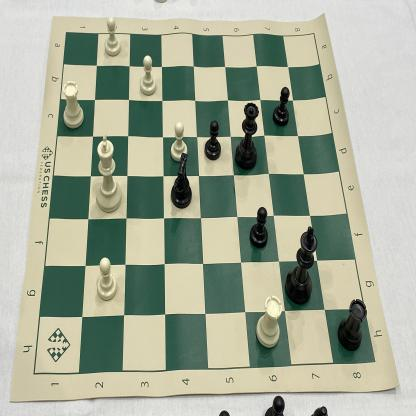

In [ ]:
Image(f'{test_img_path}')

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/chess_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.7 --source '{test_img_path}'

detect: weights=['/content/yolov5/runs/train/chess_yolov5s/weights/best.pt'], source=/content/dataset/test/images/e4583d082076b2b549b3736ad1b193c9_jpg.rf.c64d9d89f8d479bf811e6b355b93e90e.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/dataset/test/images/e4583d082076b2b549b3736ad1b193c9_jpg.rf.c64d9d89f8d479bf811e6b355b93e90e.jpg: 416x416 1 black-king, 1 black-knight, 3 black-pawns, 1 black-rook, 1 white-king, 4 white-pawns, 2 white-rooks, 7.3ms


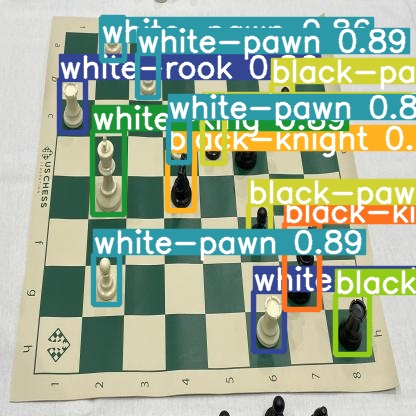

In [ ]:
test_img_path = '/content/yolov5/runs/detect/exp/e4583d082076b2b549b3736ad1b193c9_jpg.rf.c64d9d89f8d479bf811e6b355b93e90e.jpg'
Image(f'{test_img_path}')